In [111]:
include("solutionFunctions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


# Waves on a Ferrofluid Jet

In [113]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Broyden, 5000);

Branch point 10 of 100, 5 iterations.
Branch point 20 of 100, 5 iterations.
Branch point 30 of 100, 5 iterations.
Branch point 40 of 100, 5 iterations.
Branch point 50 of 100, 5 iterations.
Branch point 60 of 100, 5 iterations.
Branch point 70 of 100, 5 iterations.
Branch point 80 of 100, 5 iterations.
Branch point 90 of 100, 6 iterations.
Branch point 100 of 100, 11 iterations.
  1.140208 seconds (59.91 M allocations: 2.251 GiB, 24.78% gc time)


Comparing the different methods:

In [43]:
# ## Initialize 

# branchN = 100
# a1Vals = collect(range(0.001, 0.33, branchN + 1))

# # initialze constants
# constants = Constants(36,π,1.5,0.1)

# # initialize wave speed and wave number 
# k1 = 1*π/constants.L
# cInitial = c0(k1, constants);

# # initial guess 
# initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
# initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]

# @time @noprint solutions_n = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Newton, 5000);
# @time @noprint solutions_nr = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :NewtonRaphson, 5000);
# @time @noprint solutions_b = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :Broyden, 5000);

# # print time taken for each
# println("Newton: ", @elapsed solutions_n)
# println("NewtonRaphson: ", @elapsed solutions_nr)
# println("Broyden: ", @elapsed solutions_b)

The best solution (lowest `tol`) that we can compute, for the largest # of modes

In [56]:
## Initialize 

branchN = 10000
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(32,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]


## Compute solution branch
@time solutions, iterations = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-14, :Broyden, 20000);

Branch point 1000 of 10000, 4 iterations.
Branch point 2000 of 10000, 6 iterations.
Branch point 3000 of 10000, 6 iterations.
Branch point 4000 of 10000, 6 iterations.
Branch point 5000 of 10000, 7 iterations.
Branch point 6000 of 10000, 22 iterations.
Branch point 7000 of 10000, 128 iterations.
Branch point 8000 of 10000, 97 iterations.
Branch point 9000 of 10000, 430 iterations.
Branch point 10000 of 10000, 929 iterations.
1107.153392 seconds (42.85 G allocations: 1.664 TiB, 16.98% gc time)


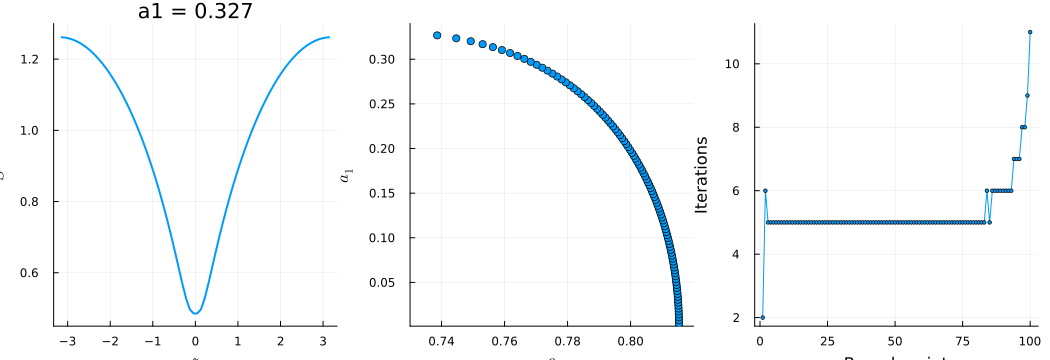

In [92]:
# convert and visualize

solcoeffs = solutions[:,2:end]
solspeeds = solutions[:,1]

# create array for profiles
profiles = zeros(branchN,length(constants.z))

# convert profiles
for i = 1:branchN
    profiles[i,:] .= fourierSeries(solcoeffs[i,:], constants.z, constants.L)[1]
end

# reflect profiles 
solprofiles = [profiles[:,Int(end/2)+1:end] profiles[:,1:Int(end/2)]]; nothing

# plotting
profile_plot, branch_plot, coeff_plot = plotting(solutions, branchN, constants)
convergence_plot = plot(iterations, xlabel="Branch point", ylabel="Iterations", legend=false, seriestype = :line, marker = :dot, markersize = 2)

ylims!(profile_plot, 0.45,1.3)

xlims!(branch_plot, 0.73,0.82)
ylims!(branch_plot, 0.001,0.34)

plot(profile_plot, branch_plot, convergence_plot, size=(350*3,360), layout = (1,3))